# Chapter 2 - Train a Small Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

Set the random seed to 2 so you always see similar results:

In [2]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

### Your task

After your astounding success at the factory, you have been asked to help the restaurants. Some restaurant reviewers have complained that they received pizzas with two types of sauce, tomato, and barbecue, or no sauce whatsoever. The pizza was either soggy or dry.

Your data will come from the cameras that sit above the ingredient trays. You get information about whether the chef has used - or not - any sauce for the pizza.

### Understand the data

In [3]:
bad_pizza_dataset = pd.DataFrame.from_dict({
        'tomato_sauce': ['no', 'no', 'yes', 'yes'],
        'barbecue_sauce': ['no', 'yes', 'no', 'yes'],
        'result': ['sauce error', 'good', 'good', 'sauce error']
    }
)

In [4]:
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result
0,no,no,sauce error
1,no,yes,good
2,yes,no,good
3,yes,yes,sauce error


Convert the data into numbers again:

In [5]:
bad_pizza_dataset['c_tomato_sauce'] = bad_pizza_dataset['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_barbecue_sauce'] = bad_pizza_dataset['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_result'] = bad_pizza_dataset['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

And check it:

In [6]:
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result,c_tomato_sauce,c_barbecue_sauce,c_result
0,no,no,sauce error,0,0,1
1,no,yes,good,0,1,0
2,yes,no,good,1,0,0
3,yes,yes,sauce error,1,1,1


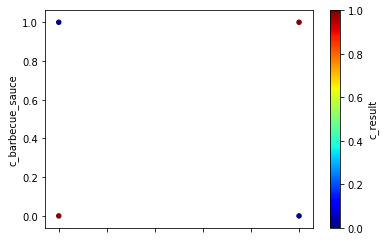

In [7]:
bad_pizza_dataset.plot(
    kind='scatter', 
    x='c_tomato_sauce', 
    y='c_barbecue_sauce', 
    c='c_result', 
    colormap='jet'
)

### Set Up and Train Your First Neural Network

In [8]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()

bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

sgd = SGD()

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
bad_pizza_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Let's start training:

In [9]:
history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000,
)

Epoch 1/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 998us/step - loss: 0.7584 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 985us/step - loss: 0.7580 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 776us/step - loss: 0.7575 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 760us/step - loss: 0.7571 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 888us/step - loss: 0.7566 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 812us/step - loss: 0.7562 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 822us/step - loss: 0.7557 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 859us/step - loss: 0.7553 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 873us/step - loss: 0.7549 - accuracy: 0.5000
E

1/1 [==============================] - 0s 923us/step - loss: 0.7302 - accuracy: 0.5000
Epoch 83/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7299 - accuracy: 0.5000
Epoch 84/3000
1/1 [==============================] - 0s 909us/step - loss: 0.7297 - accuracy: 0.5000
Epoch 85/3000
1/1 [==============================] - 0s 975us/step - loss: 0.7294 - accuracy: 0.5000
Epoch 86/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7291 - accuracy: 0.5000
Epoch 87/3000
1/1 [==============================] - 0s 972us/step - loss: 0.7289 - accuracy: 0.5000
Epoch 88/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7286 - accuracy: 0.5000
Epoch 89/3000
1/1 [==============================] - 0s 848us/step - loss: 0.7284 - accuracy: 0.5000
Epoch 90/3000
1/1 [==============================] - 0s 852us/step - loss: 0.7281 - accuracy: 0.5000
Epoch 91/3000
1/1 [==============================] - 0s 864us/step - loss: 0.7279 - accuracy: 0.5000
Epoch 92/3

1/1 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.5000
Epoch 163/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5000
Epoch 164/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7137 - accuracy: 0.5000
Epoch 165/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 166/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7134 - accuracy: 0.5000
Epoch 167/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.5000
Epoch 168/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5000
Epoch 169/3000
1/1 [==============================] - 0s 950us/step - loss: 0.7129 - accuracy: 0.5000
Epoch 170/3000
1/1 [==============================] - 0s 927us/step - loss: 0.7128 - accuracy: 0.5000
Epoch 171/3000
1/1 [==============================] - 0s 954us/step - loss: 0.7126 - accuracy: 0.5000
Epoch 172

1/1 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 244/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 245/3000
1/1 [==============================] - 0s 855us/step - loss: 0.7044 - accuracy: 0.5000
Epoch 246/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.5000
Epoch 247/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.5000
Epoch 248/3000
1/1 [==============================] - 0s 991us/step - loss: 0.7042 - accuracy: 0.5000
Epoch 249/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.5000
Epoch 250/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.5000
Epoch 251/3000
1/1 [==============================] - 0s 983us/step - loss: 0.7039 - accuracy: 0.5000
Epoch 252/3000
1/1 [==============================] - 0s 955us/step - loss: 0.7039 - accuracy: 0.5000
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 325/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 326/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 327/3000
1/1 [==============================] - 0s 991us/step - loss: 0.6991 - accuracy: 0.5000
Epoch 328/3000
1/1 [==============================] - 0s 940us/step - loss: 0.6991 - accuracy: 0.5000
Epoch 329/3000
1/1 [==============================] - 0s 927us/step - loss: 0.6991 - accuracy: 0.5000
Epoch 330/3000
1/1 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.50 - 0s 882us/step - loss: 0.6990 - accuracy: 0.5000
Epoch 331/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 332/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 333/3000
1/1 [==============================] - 0s 956us/st

1/1 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 405/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 406/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 407/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 408/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 409/3000
1/1 [==============================] - 0s 999us/step - loss: 0.6962 - accuracy: 0.5000
Epoch 410/3000
1/1 [==============================] - 0s 871us/step - loss: 0.6961 - accuracy: 0.5000
Epoch 411/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 412/3000
1/1 [==============================] - 0s 913us/step - loss: 0.6961 - accuracy: 0.5000
Epoch 413/3000
1/1 [==============================] - 0s 875us/step - loss: 0.6960 - accuracy: 0.5000
Epoch 4

1/1 [==============================] - 0s 919us/step - loss: 0.6945 - accuracy: 0.5000
Epoch 486/3000
1/1 [==============================] - 0s 971us/step - loss: 0.6945 - accuracy: 0.5000
Epoch 487/3000
1/1 [==============================] - 0s 884us/step - loss: 0.6945 - accuracy: 0.5000
Epoch 488/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 489/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 490/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 491/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 492/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 493/3000
1/1 [==============================] - 0s 919us/step - loss: 0.6944 - accuracy: 0.5000
Epoch 494/3000
1/1 [==============================] - 0s 945us/step - loss: 0.6944 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 921us/step - loss: 0.6935 - accuracy: 0.2500
Epoch 567/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 568/3000
1/1 [==============================] - 0s 932us/step - loss: 0.6935 - accuracy: 0.2500
Epoch 569/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 570/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 571/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 572/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 573/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 574/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 575/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.2500
Epoch 576/3

1/1 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.2500
Epoch 647/3000
1/1 [==============================] - 0s 983us/step - loss: 0.6930 - accuracy: 0.2500
Epoch 648/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.2500
Epoch 649/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.2500
Epoch 650/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.2500
Epoch 651/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.2500
Epoch 652/3000
1/1 [==============================] - 0s 861us/step - loss: 0.6929 - accuracy: 0.2500
Epoch 653/3000
1/1 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.25 - 0s 844us/step - loss: 0.6929 - accuracy: 0.2500
Epoch 654/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.2500
Epoch 655/3000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 961us/step - loss: 0.6926 - accuracy: 0.2500
Epoch 728/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 729/3000
1/1 [==============================] - 0s 964us/step - loss: 0.6926 - accuracy: 0.2500
Epoch 730/3000
1/1 [==============================] - 0s 988us/step - loss: 0.6926 - accuracy: 0.2500
Epoch 731/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 732/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 733/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 734/3000
1/1 [==============================] - 0s 976us/step - loss: 0.6926 - accuracy: 0.2500
Epoch 735/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 736/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.2500
Epoch 7

1/1 [==============================] - 0s 991us/step - loss: 0.6924 - accuracy: 0.2500
Epoch 809/3000
1/1 [==============================] - 0s 982us/step - loss: 0.6924 - accuracy: 0.2500
Epoch 810/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 811/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 812/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 813/3000
1/1 [==============================] - 0s 984us/step - loss: 0.6924 - accuracy: 0.2500
Epoch 814/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 815/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 816/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.2500
Epoch 817/3000
1/1 [==============================] - 0s 940us/step - loss: 0.6924 - accuracy: 0.2500
Epoch 8

Epoch 889/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.2500
Epoch 890/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.2500
Epoch 891/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.2500
Epoch 892/3000
1/1 [==============================] - 0s 969us/step - loss: 0.6923 - accuracy: 0.2500
Epoch 893/3000
1/1 [==============================] - 0s 889us/step - loss: 0.6923 - accuracy: 0.2500
Epoch 894/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.2500
Epoch 895/3000
1/1 [==============================] - 0s 908us/step - loss: 0.6923 - accuracy: 0.2500
Epoch 896/3000
1/1 [==============================] - 0s 831us/step - loss: 0.6923 - accuracy: 0.5000
Epoch 897/3000
1/1 [==============================] - 0s 875us/step - loss: 0.6923 - accuracy: 0.5000
Epoch 898/3000
1/1 [==============================] - 0s 881us/step - loss: 0.6923 - accur

1/1 [==============================] - 0s 954us/step - loss: 0.6922 - accuracy: 0.5000
Epoch 970/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 971/3000
1/1 [==============================] - 0s 997us/step - loss: 0.6922 - accuracy: 0.5000
Epoch 972/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 973/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 974/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch 975/3000
1/1 [==============================] - 0s 950us/step - loss: 0.6922 - accuracy: 0.5000
Epoch 976/3000
1/1 [==============================] - 0s 944us/step - loss: 0.6922 - accuracy: 0.5000
Epoch 977/3000
1/1 [==============================] - 0s 969us/step - loss: 0.6922 - accuracy: 0.5000
Epoch 978/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1050/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1051/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1052/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1053/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1054/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1055/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1056/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1057/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1058/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1130/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1131/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1132/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1133/3000
1/1 [==============================] - 0s 943us/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1134/3000
1/1 [==============================] - 0s 873us/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1135/3000
1/1 [==============================] - 0s 854us/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1136/3000
1/1 [==============================] - 0s 922us/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1137/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 1138/3000
1/1 [==============================] - 0s 955us/step - loss: 0.6921 - accuracy: 0.5

1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1210/3000
1/1 [==============================] - 0s 892us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1211/3000
1/1 [==============================] - 0s 906us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1212/3000
1/1 [==============================] - 0s 877us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1213/3000
1/1 [==============================] - 0s 847us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1214/3000
1/1 [==============================] - 0s 854us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1215/3000
1/1 [==============================] - 0s 991us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1216/3000
1/1 [==============================] - 0s 983us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1217/3000
1/1 [==============================] - 0s 812us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1218/3000
1/1 [==============================] - 0s 808us/step - loss: 0.6920 - accur

1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1290/3000
1/1 [==============================] - 0s 952us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1291/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1292/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1293/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1294/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1295/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1296/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1297/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1298/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 922us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1370/3000
1/1 [==============================] - 0s 862us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1371/3000
1/1 [==============================] - 0s 890us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1372/3000
1/1 [==============================] - 0s 907us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1373/3000
1/1 [==============================] - 0s 901us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1374/3000
1/1 [==============================] - 0s 930us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1375/3000
1/1 [==============================] - 0s 971us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1376/3000
1/1 [==============================] - 0s 891us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1377/3000
1/1 [==============================] - 0s 889us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1378/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accur

1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1449/3000
1/1 [==============================] - 0s 951us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1450/3000
1/1 [==============================] - 0s 907us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1451/3000
1/1 [==============================] - 0s 978us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1452/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1453/3000
1/1 [==============================] - 0s 949us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1454/3000
1/1 [==============================] - 0s 920us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1455/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 1456/3000
1/1 [==============================] - 0s 984us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1457/3000
1/1 [==============================] - 0s 937us/step - loss: 0.6919 - accuracy:

1/1 [==============================] - 0s 877us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1529/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1530/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1531/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1532/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1533/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1534/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1535/3000
1/1 [==============================] - 0s 945us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1536/3000
1/1 [==============================] - 0s 845us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1537/3000
1/1 [==============================] - 0s 880us/step - loss: 0.6919 - accuracy: 0.500

1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1609/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1610/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1611/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1612/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1613/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1614/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1615/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1616/3000
1/1 [==============================] - 0s 960us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1617/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1689/3000
1/1 [==============================] - 0s 944us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1690/3000
1/1 [==============================] - 0s 962us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1691/3000
1/1 [==============================] - 0s 978us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1692/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1693/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1694/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1695/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1696/3000
1/1 [==============================] - 0s 965us/step - loss: 0.6919 - accuracy: 0.5000
Epoch 1697/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.500

1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1769/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1770/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1771/3000
1/1 [==============================] - 0s 938us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1772/3000
1/1 [==============================] - 0s 858us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1773/3000
1/1 [==============================] - 0s 891us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1774/3000
1/1 [==============================] - 0s 909us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1775/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1776/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1777/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.500

1/1 [==============================] - 0s 884us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1849/3000
1/1 [==============================] - 0s 944us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1850/3000
1/1 [==============================] - 0s 973us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1851/3000
1/1 [==============================] - 0s 963us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1852/3000
1/1 [==============================] - 0s 905us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1853/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1854/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1855/3000
1/1 [==============================] - 0s 895us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1856/3000
1/1 [==============================] - 0s 862us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1857/3000
1/1 [==============================] - 0s 895us/step - loss: 0.6918 - accurac

1/1 [==============================] - 0s 931us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1929/3000
1/1 [==============================] - 0s 958us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1930/3000
1/1 [==============================] - 0s 904us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1931/3000
1/1 [==============================] - 0s 901us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1932/3000
1/1 [==============================] - 0s 896us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1933/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1934/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1935/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1936/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 1937/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5

1/1 [==============================] - 0s 987us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2008/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2009/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2010/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2011/3000
1/1 [==============================] - 0s 978us/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2012/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5000
Epoch 2013/3000
1/1 [==============================] - 0s 959us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2014/3000
1/1 [==============================] - 0s 969us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2015/3000
1/1 [==============================] - 0s 961us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2016/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5

1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2088/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2089/3000
1/1 [==============================] - 0s 880us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2090/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2091/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2092/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2093/3000
1/1 [==============================] - 0s 994us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2094/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2095/3000
1/1 [==============================] - 0s 904us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2096/3000
1/1 [==============================] - 0s 967us/step - loss: 0.6917 - accuracy: 0.500

1/1 [==============================] - 0s 922us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2168/3000
1/1 [==============================] - 0s 992us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2169/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2170/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2171/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2172/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2173/3000
1/1 [==============================] - 0s 899us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2174/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2175/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2176/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000


1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2247/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2248/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2249/3000
1/1 [==============================] - 0s 889us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2250/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2251/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2252/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2253/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2254/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2255/3000
1/1 [==============================] - 0s 961us/step - loss: 0.6917 - accuracy: 0.5000
Ep

1/1 [==============================] - 0s 968us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2327/3000
1/1 [==============================] - 0s 969us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2328/3000
1/1 [==============================] - 0s 860us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2329/3000
1/1 [==============================] - 0s 889us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2330/3000
1/1 [==============================] - 0s 979us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2331/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2332/3000
1/1 [==============================] - 0s 882us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2333/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2334/3000
1/1 [==============================] - 0s 936us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2335/3000
1/1 [==============================] - 0s 891us/step - loss: 0.6916 - accurac

1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2407/3000
1/1 [==============================] - 0s 926us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2408/3000
1/1 [==============================] - 0s 924us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2409/3000
1/1 [==============================] - 0s 933us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2410/3000
1/1 [==============================] - 0s 989us/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2411/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2412/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2413/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2414/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2415/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.500

1/1 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2487/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2488/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2489/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2490/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2491/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2492/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2493/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2494/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2495/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2567/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2568/3000
1/1 [==============================] - 0s 857us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2569/3000
1/1 [==============================] - 0s 809us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2570/3000
1/1 [==============================] - 0s 878us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2571/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2572/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2573/3000
1/1 [==============================] - 0s 973us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2574/3000
1/1 [==============================] - 0s 860us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2575/3000
1/1 [==============================] - 0s 867us/step - loss: 0.6915 - accuracy: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2647/3000
1/1 [==============================] - 0s 910us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2648/3000
1/1 [==============================] - 0s 906us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2649/3000
1/1 [==============================] - 0s 893us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2650/3000
1/1 [==============================] - 0s 937us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2651/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2652/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2653/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2654/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2655/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.500

1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2727/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2728/3000
1/1 [==============================] - 0s 925us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2729/3000
1/1 [==============================] - 0s 938us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2730/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2731/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2732/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2733/3000
1/1 [==============================] - 0s 900us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2734/3000
1/1 [==============================] - 0s 965us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 2735/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.500

1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2807/3000
1/1 [==============================] - 0s 906us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2808/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2809/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2810/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2811/3000
1/1 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.50 - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2812/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2813/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2814/3000
1/1 [==============================] - 0s 963us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2815/3000
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2886/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2887/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2888/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2889/3000
1/1 [==============================] - 0s 993us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2890/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2891/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2892/3000
1/1 [==============================] - 0s 811us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2893/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2894/3000
1/1 [==============================] - 0s 991us/step - loss: 0.6914 - accuracy: 0.5000


1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2966/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2967/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2968/3000
1/1 [==============================] - 0s 900us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2969/3000
1/1 [==============================] - 0s 931us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2970/3000
1/1 [==============================] - 0s 963us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2971/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2972/3000
1/1 [==============================] - 0s 959us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2973/3000
1/1 [==============================] - 0s 882us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2974/3000
1/1 [==============================] - 0s 890us/step - loss: 0.6914 - accuracy: 0

In [10]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5000
Evaluation result on Test Data : Loss = 0.6913481950759888, accuracy = 0.5


The model finished training, but the results are not as good as expected. To debug it, let's look at how training loss is changing:

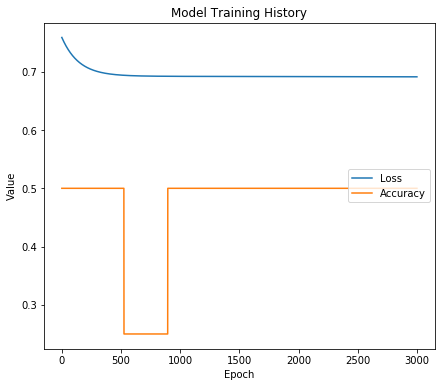

In [11]:
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Your graph might look a bit different, but here’s how to interpret it: Loss moves slowly down, meaning that the model is learning; however, training is going very slowly - the learning rate could be too small. It could even be stuck. Let's try increasing the learning rate!

In [12]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()

bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

high_lr_sgd = SGD(learning_rate=10)

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=high_lr_sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [13]:
high_lr_model_history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.7500
Epoch 3/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.2500
Epoch 4/3000
1/1 [==============================] - 0s 739us/step - loss: 0.7007 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 740us/step - loss: 0.7432 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 850us/step - loss: 0.9263 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 858us/step - loss: 1.2595 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 858us/step - loss: 1.2545 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 902us/step - loss: 1.0974 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 970us/step - loss: 1.0799 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 896us/step - loss: 0.4806 - accuracy: 0.7500
Epoch 84/3000
1/1 [==============================] - 0s 895us/step - loss: 0.4800 - accuracy: 0.7500
Epoch 85/3000
1/1 [==============================] - 0s 943us/step - loss: 0.4794 - accuracy: 0.7500
Epoch 86/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7500
Epoch 87/3000
1/1 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.75 - 0s 842us/step - loss: 0.4779 - accuracy: 0.7500
Epoch 88/3000
1/1 [==============================] - 0s 753us/step - loss: 0.4770 - accuracy: 0.7500
Epoch 89/3000
1/1 [==============================] - 0s 716us/step - loss: 0.4759 - accuracy: 0.7500
Epoch 90/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7500
Epoch 91/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7500
Epoch 92/3000
1/1 [==============================] - 0s 971us/step - 

1/1 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 165/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 166/3000
1/1 [==============================] - 0s 927us/step - loss: 0.0196 - accuracy: 1.0000
Epoch 167/3000
1/1 [==============================] - 0s 932us/step - loss: 0.0191 - accuracy: 1.0000
Epoch 168/3000
1/1 [==============================] - 0s 949us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 169/3000
1/1 [==============================] - 0s 942us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 170/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 171/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 172/3000
1/1 [==============================] - 0s 877us/step - loss: 0.0173 - accuracy: 1.0000
Epoch 173/3000
1/1 [==============================] - 0s 864us/step - loss: 0.0170 - accuracy: 1.0000
Epo

Epoch 245/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 246/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 247/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 248/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 249/3000
1/1 [==============================] - 0s 981us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 250/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 251/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 252/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 253/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 254/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.000

1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 326/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 327/3000
1/1 [==============================] - 0s 973us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 328/3000
1/1 [==============================] - 0s 975us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 329/3000
1/1 [==============================] - 0s 956us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 330/3000
1/1 [==============================] - 0s 977us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 331/3000
1/1 [==============================] - 0s 853us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - 0s 853us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - 0s 867us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 334/3000
1/1 [==============================] - 0s 983us/step - loss: 0.0044 - accuracy: 1.0000

1/1 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 407/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 408/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 409/3000
1/1 [==============================] - 0s 992us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 410/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 411/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 412/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 413/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 414/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 415/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 416/300

1/1 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 488/3000
1/1 [==============================] - 0s 911us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 489/3000
1/1 [==============================] - 0s 920us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 490/3000
1/1 [==============================] - 0s 843us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 491/3000
1/1 [==============================] - 0s 852us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 492/3000
1/1 [==============================] - 0s 894us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 493/3000
1/1 [==============================] - 0s 895us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 494/3000
1/1 [==============================] - 0s 906us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - 0s 946us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 496/3000
1/1 [==============================] - 0s 883us/step - loss: 0.0025 - accuracy: 1.00

1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 568/3000
1/1 [==============================] - 0s 961us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 569/3000
1/1 [==============================] - 0s 962us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 570/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 571/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 572/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 573/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 574/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 575/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 576/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 577/3

1/1 [==============================] - 0s 925us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 649/3000
1/1 [==============================] - 0s 945us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 650/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 651/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 652/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 653/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 654/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 655/3000
1/1 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 656/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 657/3000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 730/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 731/3000
1/1 [==============================] - 0s 947us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 732/3000
1/1 [==============================] - 0s 921us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 733/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 734/3000
1/1 [==============================] - 0s 867us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 735/3000
1/1 [==============================] - 0s 912us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 736/3000
1/1 [==============================] - 0s 921us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 737/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 738/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 810/3000
1/1 [==============================] - 0s 990us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 811/3000
1/1 [==============================] - 0s 970us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 812/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 813/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 814/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 815/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 816/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 817/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 818/3000
1/1 [==============================] - 0s 976us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 819

1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 891/3000
1/1 [==============================] - 0s 917us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 892/3000
1/1 [==============================] - 0s 856us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 893/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 894/3000
1/1 [==============================] - 0s 922us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 895/3000
1/1 [==============================] - 0s 903us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 896/3000
1/1 [==============================] - 0s 992us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 897/3000
1/1 [==============================] - 0s 930us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 898/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 899/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 921us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 972/3000
1/1 [==============================] - 0s 950us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 973/3000
1/1 [==============================] - 0s 891us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 974/3000
1/1 [==============================] - 0s 937us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 975/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 976/3000
1/1 [==============================] - 0s 925us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 977/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 978/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 979/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 980/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1052/3000
1/1 [==============================] - 0s 939us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1053/3000
1/1 [==============================] - 0s 968us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1054/3000
1/1 [==============================] - 0s 951us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1055/3000
1/1 [==============================] - 0s 977us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1056/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1057/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1058/3000
1/1 [==============================] - 0s 859us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1059/3000
1/1 [==============================] - 0s 920us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 1060/3000
1/1 [==============================] - 0s 876us/step - loss: 0.0010 - accuracy:

1/1 [==============================] - 0s 902us/step - loss: 9.3858e-04 - accuracy: 1.0000
Epoch 1129/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.3764e-04 - accuracy: 1.0000
Epoch 1130/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.3671e-04 - accuracy: 1.0000
Epoch 1131/3000
1/1 [==============================] - 0s 2ms/step - loss: 9.3577e-04 - accuracy: 1.0000
Epoch 1132/3000
1/1 [==============================] - 0s 2ms/step - loss: 9.3484e-04 - accuracy: 1.0000
Epoch 1133/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.3392e-04 - accuracy: 1.0000
Epoch 1134/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.3299e-04 - accuracy: 1.0000
Epoch 1135/3000
1/1 [==============================] - 0s 914us/step - loss: 9.3206e-04 - accuracy: 1.0000
Epoch 1136/3000
1/1 [==============================] - 0s 897us/step - loss: 9.3114e-04 - accuracy: 1.0000
Epoch 1137/3000
1/1 [==============================] - 0s 890us/s

1/1 [==============================] - 0s 835us/step - loss: 8.7157e-04 - accuracy: 1.0000
Epoch 1206/3000
1/1 [==============================] - 0s 922us/step - loss: 8.7077e-04 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.6996e-04 - accuracy: 1.0000
Epoch 1208/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.6916e-04 - accuracy: 1.0000
Epoch 1209/3000
1/1 [==============================] - 0s 956us/step - loss: 8.6835e-04 - accuracy: 1.0000
Epoch 1210/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.6755e-04 - accuracy: 1.0000
Epoch 1211/3000
1/1 [==============================] - 0s 988us/step - loss: 8.6675e-04 - accuracy: 1.0000
Epoch 1212/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.6595e-04 - accuracy: 1.0000
Epoch 1213/3000
1/1 [==============================] - 0s 913us/step - loss: 8.6515e-04 - accuracy: 1.0000
Epoch 1214/3000
1/1 [==============================] - 0s 948

1/1 [==============================] - 0s 1ms/step - loss: 8.1345e-04 - accuracy: 1.0000
Epoch 1283/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.1274e-04 - accuracy: 1.0000
Epoch 1284/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.1204e-04 - accuracy: 1.0000
Epoch 1285/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.1134e-04 - accuracy: 1.0000
Epoch 1286/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.1064e-04 - accuracy: 1.0000
Epoch 1287/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.0994e-04 - accuracy: 1.0000
Epoch 1288/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.0924e-04 - accuracy: 1.0000
Epoch 1289/3000
1/1 [==============================] - 0s 899us/step - loss: 8.0854e-04 - accuracy: 1.0000
Epoch 1290/3000
1/1 [==============================] - 0s 1ms/step - loss: 8.0785e-04 - accuracy: 1.0000
Epoch 1291/3000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 1ms/step - loss: 7.6255e-04 - accuracy: 1.0000
Epoch 1360/3000
1/1 [==============================] - 0s 926us/step - loss: 7.6193e-04 - accuracy: 1.0000
Epoch 1361/3000
1/1 [==============================] - 0s 916us/step - loss: 7.6131e-04 - accuracy: 1.0000
Epoch 1362/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.6069e-04 - accuracy: 1.0000
Epoch 1363/3000
1/1 [==============================] - 0s 987us/step - loss: 7.6008e-04 - accuracy: 1.0000
Epoch 1364/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.5946e-04 - accuracy: 1.0000
Epoch 1365/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.5885e-04 - accuracy: 1.0000
Epoch 1366/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.5823e-04 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.5762e-04 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 916us/step - loss: 7.1761e-04 - accuracy: 1.0000
Epoch 1437/3000
1/1 [==============================] - 0s 882us/step - loss: 7.1706e-04 - accuracy: 1.0000
Epoch 1438/3000
1/1 [==============================] - 0s 2ms/step - loss: 7.1651e-04 - accuracy: 1.0000
Epoch 1439/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.1596e-04 - accuracy: 1.0000
Epoch 1440/3000
1/1 [==============================] - 0s 950us/step - loss: 7.1542e-04 - accuracy: 1.0000
Epoch 1441/3000
1/1 [==============================] - 0s 964us/step - loss: 7.1487e-04 - accuracy: 1.0000
Epoch 1442/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.1433e-04 - accuracy: 1.0000
Epoch 1443/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.1378e-04 - accuracy: 1.0000
Epoch 1444/3000
1/1 [==============================] - 0s 1ms/step - loss: 7.1324e-04 - accuracy: 1.0000
Epoch 1445/3000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 913us/step - loss: 6.7764e-04 - accuracy: 1.0000
Epoch 1514/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.7715e-04 - accuracy: 1.0000
Epoch 1515/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.7666e-04 - accuracy: 1.0000
Epoch 1516/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.7617e-04 - accuracy: 1.0000
Epoch 1517/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.7569e-04 - accuracy: 1.0000
Epoch 1518/3000
1/1 [==============================] - 0s 896us/step - loss: 6.7520e-04 - accuracy: 1.0000
Epoch 1519/3000
1/1 [==============================] - 0s 876us/step - loss: 6.7471e-04 - accuracy: 1.0000
Epoch 1520/3000
1/1 [==============================] - 0s 2ms/step - loss: 6.7423e-04 - accuracy: 1.0000
Epoch 1521/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.7374e-04 - accuracy: 1.0000
Epoch 1522/3000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 6.4187e-04 - accuracy: 1.0000
Epoch 1591/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.4143e-04 - accuracy: 1.0000
Epoch 1592/3000
1/1 [==============================] - 0s 2ms/step - loss: 6.4099e-04 - accuracy: 1.0000
Epoch 1593/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.4055e-04 - accuracy: 1.0000
Epoch 1594/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.4011e-04 - accuracy: 1.0000
Epoch 1595/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.3968e-04 - accuracy: 1.0000
Epoch 1596/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.3924e-04 - accuracy: 1.0000
Epoch 1597/3000
1/1 [==============================] - 0s 937us/step - loss: 6.3880e-04 - accuracy: 1.0000
Epoch 1598/3000
1/1 [==============================] - 0s 931us/step - loss: 6.3837e-04 - accuracy: 1.0000
Epoch 1599/3000
1/1 [==============================] - 0s 1ms/step 

1/1 [==============================] - 0s 905us/step - loss: 6.0967e-04 - accuracy: 1.0000
Epoch 1668/3000
1/1 [==============================] - 0s 914us/step - loss: 6.0927e-04 - accuracy: 1.0000
Epoch 1669/3000
1/1 [==============================] - 0s 1ms/step - loss: 6.0887e-04 - accuracy: 1.0000
Epoch 1670/3000
1/1 [==============================] - 0s 902us/step - loss: 6.0848e-04 - accuracy: 1.0000
Epoch 1671/3000
1/1 [==============================] - 0s 892us/step - loss: 6.0808e-04 - accuracy: 1.0000
Epoch 1672/3000
1/1 [==============================] - 0s 917us/step - loss: 6.0768e-04 - accuracy: 1.0000
Epoch 1673/3000
1/1 [==============================] - 0s 927us/step - loss: 6.0729e-04 - accuracy: 1.0000
Epoch 1674/3000
1/1 [==============================] - 0s 829us/step - loss: 6.0690e-04 - accuracy: 1.0000
Epoch 1675/3000
1/1 [==============================] - 0s 841us/step - loss: 6.0650e-04 - accuracy: 1.0000
Epoch 1676/3000
1/1 [==============================] - 

1/1 [==============================] - 0s 897us/step - loss: 5.8052e-04 - accuracy: 1.0000
Epoch 1745/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.8016e-04 - accuracy: 1.0000
Epoch 1746/3000
1/1 [==============================] - 0s 941us/step - loss: 5.7980e-04 - accuracy: 1.0000
Epoch 1747/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7944e-04 - accuracy: 1.0000
Epoch 1748/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7908e-04 - accuracy: 1.0000
Epoch 1749/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7872e-04 - accuracy: 1.0000
Epoch 1750/3000
1/1 [==============================] - 0s 917us/step - loss: 5.7836e-04 - accuracy: 1.0000
Epoch 1751/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7801e-04 - accuracy: 1.0000
Epoch 1752/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7765e-04 - accuracy: 1.0000
Epoch 1753/3000
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 940us/step - loss: 5.5402e-04 - accuracy: 1.0000
Epoch 1822/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.5369e-04 - accuracy: 1.0000
Epoch 1823/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.5336e-04 - accuracy: 1.0000
Epoch 1824/3000
1/1 [==============================] - 0s 891us/step - loss: 5.5304e-04 - accuracy: 1.0000
Epoch 1825/3000
1/1 [==============================] - 0s 895us/step - loss: 5.5271e-04 - accuracy: 1.0000
Epoch 1826/3000
1/1 [==============================] - 0s 966us/step - loss: 5.5238e-04 - accuracy: 1.0000
Epoch 1827/3000
1/1 [==============================] - 0s 967us/step - loss: 5.5205e-04 - accuracy: 1.0000
Epoch 1828/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.5173e-04 - accuracy: 1.0000
Epoch 1829/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.5140e-04 - accuracy: 1.0000
Epoch 1830/3000
1/1 [==============================] - 0s 2ms

1/1 [==============================] - 0s 996us/step - loss: 5.2982e-04 - accuracy: 1.0000
Epoch 1899/3000
1/1 [==============================] - 0s 892us/step - loss: 5.2952e-04 - accuracy: 1.0000
Epoch 1900/3000
1/1 [==============================] - 0s 902us/step - loss: 5.2922e-04 - accuracy: 1.0000
Epoch 1901/3000
1/1 [==============================] - 0s 938us/step - loss: 5.2892e-04 - accuracy: 1.0000
Epoch 1902/3000
1/1 [==============================] - 0s 978us/step - loss: 5.2862e-04 - accuracy: 1.0000
Epoch 1903/3000
1/1 [==============================] - 0s 991us/step - loss: 5.2832e-04 - accuracy: 1.0000
Epoch 1904/3000
1/1 [==============================] - 0s 988us/step - loss: 5.2802e-04 - accuracy: 1.0000
Epoch 1905/3000
1/1 [==============================] - 0s 990us/step - loss: 5.2772e-04 - accuracy: 1.0000
Epoch 1906/3000
1/1 [==============================] - 0s 984us/step - loss: 5.2743e-04 - accuracy: 1.0000
Epoch 1907/3000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 5.0764e-04 - accuracy: 1.0000
Epoch 1976/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.0736e-04 - accuracy: 1.0000
Epoch 1977/3000
1/1 [==============================] - 0s 948us/step - loss: 5.0709e-04 - accuracy: 1.0000
Epoch 1978/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.0681e-04 - accuracy: 1.0000
Epoch 1979/3000
1/1 [==============================] - 0s 991us/step - loss: 5.0653e-04 - accuracy: 1.0000
Epoch 1980/3000
1/1 [==============================] - 0s 988us/step - loss: 5.0626e-04 - accuracy: 1.0000
Epoch 1981/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.0599e-04 - accuracy: 1.0000
Epoch 1982/3000
1/1 [==============================] - 0s 969us/step - loss: 5.0571e-04 - accuracy: 1.0000
Epoch 1983/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.0544e-04 - accuracy: 1.0000
Epoch 1984/3000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 1ms/step - loss: 4.8723e-04 - accuracy: 1.0000
Epoch 2053/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8697e-04 - accuracy: 1.0000
Epoch 2054/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8672e-04 - accuracy: 1.0000
Epoch 2055/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8646e-04 - accuracy: 1.0000
Epoch 2056/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8621e-04 - accuracy: 1.0000
Epoch 2057/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8596e-04 - accuracy: 1.0000
Epoch 2058/3000
1/1 [==============================] - 0s 918us/step - loss: 4.8570e-04 - accuracy: 1.0000
Epoch 2059/3000
1/1 [==============================] - 0s 922us/step - loss: 4.8545e-04 - accuracy: 1.0000
Epoch 2060/3000
1/1 [==============================] - 0s 973us/step - loss: 4.8520e-04 - accuracy: 1.0000
Epoch 2061/3000
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 1ms/step - loss: 4.6862e-04 - accuracy: 1.0000
Epoch 2129/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6838e-04 - accuracy: 1.0000
Epoch 2130/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6815e-04 - accuracy: 1.0000
Epoch 2131/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6791e-04 - accuracy: 1.0000
Epoch 2132/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.6768e-04 - accuracy: 1.0000
Epoch 2133/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6745e-04 - accuracy: 1.0000
Epoch 2134/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.6721e-04 - accuracy: 1.0000
Epoch 2135/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6698e-04 - accuracy: 1.0000
Epoch 2136/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.6674e-04 - accuracy: 1.0000
Epoch 2137/3000
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 4.5116e-04 - accuracy: 1.0000
Epoch 2206/3000
1/1 [==============================] - 0s 995us/step - loss: 4.5094e-04 - accuracy: 1.0000
Epoch 2207/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.5072e-04 - accuracy: 1.0000
Epoch 2208/3000
1/1 [==============================] - 0s 915us/step - loss: 4.5050e-04 - accuracy: 1.0000
Epoch 2209/3000
1/1 [==============================] - 0s 981us/step - loss: 4.5029e-04 - accuracy: 1.0000
Epoch 2210/3000
1/1 [==============================] - 0s 991us/step - loss: 4.5007e-04 - accuracy: 1.0000
Epoch 2211/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.4985e-04 - accuracy: 1.0000
Epoch 2212/3000
1/1 [==============================] - 0s 967us/step - loss: 4.4963e-04 - accuracy: 1.0000
Epoch 2213/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.4942e-04 - accuracy: 1.0000
Epoch 2214/3000
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 968us/step - loss: 4.3494e-04 - accuracy: 1.0000
Epoch 2283/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.3474e-04 - accuracy: 1.0000
Epoch 2284/3000
1/1 [==============================] - 0s 933us/step - loss: 4.3454e-04 - accuracy: 1.0000
Epoch 2285/3000
1/1 [==============================] - 0s 928us/step - loss: 4.3433e-04 - accuracy: 1.0000
Epoch 2286/3000
1/1 [==============================] - 0s 910us/step - loss: 4.3413e-04 - accuracy: 1.0000
Epoch 2287/3000
1/1 [==============================] - 0s 933us/step - loss: 4.3393e-04 - accuracy: 1.0000
Epoch 2288/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.3373e-04 - accuracy: 1.0000
Epoch 2289/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.3353e-04 - accuracy: 1.0000
Epoch 2290/3000
1/1 [==============================] - ETA: 0s - loss: 4.3332e-04 - accuracy: 1.00 - 0s 2ms/step - loss: 4.3332e-04 - accuracy: 1.0000
Epoch 2291/3000

1/1 [==============================] - 0s 1ms/step - loss: 4.2004e-04 - accuracy: 1.0000
Epoch 2359/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.1985e-04 - accuracy: 1.0000
Epoch 2360/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1966e-04 - accuracy: 1.0000
Epoch 2361/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1947e-04 - accuracy: 1.0000
Epoch 2362/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1928e-04 - accuracy: 1.0000
Epoch 2363/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1909e-04 - accuracy: 1.0000
Epoch 2364/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1890e-04 - accuracy: 1.0000
Epoch 2365/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.1872e-04 - accuracy: 1.0000
Epoch 2366/3000
1/1 [==============================] - 0s 926us/step - loss: 4.1853e-04 - accuracy: 1.0000
Epoch 2367/3000
1/1 [==============================] - 0s 932us/step 

1/1 [==============================] - 0s 1ms/step - loss: 4.0594e-04 - accuracy: 1.0000
Epoch 2436/3000
1/1 [==============================] - 0s 927us/step - loss: 4.0576e-04 - accuracy: 1.0000
Epoch 2437/3000
1/1 [==============================] - 0s 931us/step - loss: 4.0558e-04 - accuracy: 1.0000
Epoch 2438/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.0541e-04 - accuracy: 1.0000
Epoch 2439/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.0523e-04 - accuracy: 1.0000
Epoch 2440/3000
1/1 [==============================] - 0s 931us/step - loss: 4.0505e-04 - accuracy: 1.0000
Epoch 2441/3000
1/1 [==============================] - 0s 949us/step - loss: 4.0488e-04 - accuracy: 1.0000
Epoch 2442/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.0470e-04 - accuracy: 1.0000
Epoch 2443/3000
1/1 [==============================] - ETA: 0s - loss: 4.0453e-04 - accuracy: 1.00 - 0s 1ms/step - loss: 4.0453e-04 - accuracy: 1.0000
Epoch 2444/3000
1

1/1 [==============================] - 0s 1ms/step - loss: 3.9292e-04 - accuracy: 1.0000
Epoch 2512/3000
1/1 [==============================] - 0s 886us/step - loss: 3.9275e-04 - accuracy: 1.0000
Epoch 2513/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9258e-04 - accuracy: 1.0000
Epoch 2514/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9242e-04 - accuracy: 1.0000
Epoch 2515/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9225e-04 - accuracy: 1.0000
Epoch 2516/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9209e-04 - accuracy: 1.0000
Epoch 2517/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9192e-04 - accuracy: 1.0000
Epoch 2518/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9176e-04 - accuracy: 1.0000
Epoch 2519/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.9159e-04 - accuracy: 1.0000
Epoch 2520/3000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 1ms/step - loss: 3.8054e-04 - accuracy: 1.0000
Epoch 2589/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.8039e-04 - accuracy: 1.0000
Epoch 2590/3000
1/1 [==============================] - 0s 818us/step - loss: 3.8023e-04 - accuracy: 1.0000
Epoch 2591/3000
1/1 [==============================] - 0s 880us/step - loss: 3.8008e-04 - accuracy: 1.0000
Epoch 2592/3000
1/1 [==============================] - ETA: 0s - loss: 3.7992e-04 - accuracy: 1.00 - 0s 834us/step - loss: 3.7992e-04 - accuracy: 1.0000
Epoch 2593/3000
1/1 [==============================] - 0s 911us/step - loss: 3.7977e-04 - accuracy: 1.0000
Epoch 2594/3000
1/1 [==============================] - 0s 859us/step - loss: 3.7961e-04 - accuracy: 1.0000
Epoch 2595/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.7946e-04 - accuracy: 1.0000
Epoch 2596/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.7930e-04 - accuracy: 1.0000
Epoch 2597/3000

1/1 [==============================] - 0s 1ms/step - loss: 3.6907e-04 - accuracy: 1.0000
Epoch 2665/3000
1/1 [==============================] - 0s 902us/step - loss: 3.6892e-04 - accuracy: 1.0000
Epoch 2666/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.6878e-04 - accuracy: 1.0000
Epoch 2667/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.6863e-04 - accuracy: 1.0000
Epoch 2668/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.6848e-04 - accuracy: 1.0000
Epoch 2669/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.6834e-04 - accuracy: 1.0000
Epoch 2670/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.6819e-04 - accuracy: 1.0000
Epoch 2671/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.6805e-04 - accuracy: 1.0000
Epoch 2672/3000
1/1 [==============================] - 0s 965us/step - loss: 3.6790e-04 - accuracy: 1.0000
Epoch 2673/3000
1/1 [==============================] - 0s 1ms/step 

1/1 [==============================] - 0s 1ms/step - loss: 3.5812e-04 - accuracy: 1.0000
Epoch 2742/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5799e-04 - accuracy: 1.0000
Epoch 2743/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5785e-04 - accuracy: 1.0000
Epoch 2744/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5771e-04 - accuracy: 1.0000
Epoch 2745/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5757e-04 - accuracy: 1.0000
Epoch 2746/3000
1/1 [==============================] - 0s 817us/step - loss: 3.5744e-04 - accuracy: 1.0000
Epoch 2747/3000
1/1 [==============================] - 0s 907us/step - loss: 3.5730e-04 - accuracy: 1.0000
Epoch 2748/3000
1/1 [==============================] - 0s 915us/step - loss: 3.5716e-04 - accuracy: 1.0000
Epoch 2749/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.5702e-04 - accuracy: 1.0000
Epoch 2750/3000
1/1 [==============================] - 0s 893us/s

1/1 [==============================] - 0s 2ms/step - loss: 3.4781e-04 - accuracy: 1.0000
Epoch 2819/3000
1/1 [==============================] - 0s 947us/step - loss: 3.4768e-04 - accuracy: 1.0000
Epoch 2820/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4755e-04 - accuracy: 1.0000
Epoch 2821/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4742e-04 - accuracy: 1.0000
Epoch 2822/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4729e-04 - accuracy: 1.0000
Epoch 2823/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4716e-04 - accuracy: 1.0000
Epoch 2824/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.4703e-04 - accuracy: 1.0000
Epoch 2825/3000
1/1 [==============================] - ETA: 0s - loss: 3.4690e-04 - accuracy: 1.00 - 0s 1ms/step - loss: 3.4690e-04 - accuracy: 1.0000
Epoch 2826/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.4677e-04 - accuracy: 1.0000
Epoch 2827/3000
1/1 [==

1/1 [==============================] - 0s 899us/step - loss: 3.3819e-04 - accuracy: 1.0000
Epoch 2895/3000
1/1 [==============================] - 0s 950us/step - loss: 3.3807e-04 - accuracy: 1.0000
Epoch 2896/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3794e-04 - accuracy: 1.0000
Epoch 2897/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3782e-04 - accuracy: 1.0000
Epoch 2898/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3770e-04 - accuracy: 1.0000
Epoch 2899/3000
1/1 [==============================] - 0s 976us/step - loss: 3.3757e-04 - accuracy: 1.0000
Epoch 2900/3000
1/1 [==============================] - 0s 967us/step - loss: 3.3745e-04 - accuracy: 1.0000
Epoch 2901/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3733e-04 - accuracy: 1.0000
Epoch 2902/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.3721e-04 - accuracy: 1.0000
Epoch 2903/3000
1/1 [==============================] - 0s 1ms/s

1/1 [==============================] - 0s 953us/step - loss: 3.2897e-04 - accuracy: 1.0000
Epoch 2972/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.2885e-04 - accuracy: 1.0000
Epoch 2973/3000
1/1 [==============================] - ETA: 0s - loss: 3.2874e-04 - accuracy: 1.00 - 0s 1ms/step - loss: 3.2874e-04 - accuracy: 1.0000
Epoch 2974/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.2862e-04 - accuracy: 1.0000
Epoch 2975/3000
1/1 [==============================] - 0s 947us/step - loss: 3.2850e-04 - accuracy: 1.0000
Epoch 2976/3000
1/1 [==============================] - 0s 903us/step - loss: 3.2839e-04 - accuracy: 1.0000
Epoch 2977/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.2827e-04 - accuracy: 1.0000
Epoch 2978/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.2816e-04 - accuracy: 1.0000
Epoch 2979/3000
1/1 [==============================] - 0s 1ms/step - loss: 3.2804e-04 - accuracy: 1.0000
Epoch 2980/3000
1/1

They look more promising as the loss is now lower!

Let's quickly check the training loss and see how the session went:

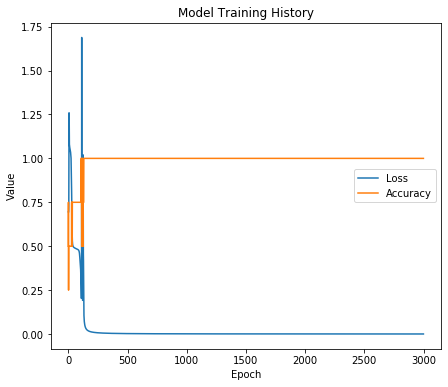

In [14]:
plt.figure(figsize=(7, 6))
plt.plot(high_lr_model_history.history['loss'])
plt.plot(high_lr_model_history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Instead of loss slowly reducing, it increased initially, signifying that the learning rate parameter is too large, which could make loss jump up or get stuck again.

Finally, try a learning rate of 1:

In [15]:
input_layer = Dense(units=3, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

sgd = SGD(learning_rate=1)

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_model = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 998us/step - loss: 0.6908 - accuracy: 0.2500
Epoch 3/3000
1/1 [==============================] - 0s 717us/step - loss: 0.6885 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 783us/step - loss: 0.6877 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 948us/step - loss: 0.6873 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 937us/step - loss: 0.6869 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 760us/step - loss: 0.6865 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 745us/step - loss: 0.6861 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.7500
Epoch 83/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7500
Epoch 84/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7500
Epoch 85/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.7500
Epoch 86/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.7500
Epoch 87/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.7500
Epoch 88/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6315 - accuracy: 0.7500
Epoch 89/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7500
Epoch 90/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7500
Epoch 91/3000
1/1 [==============================] - 0s 916us/step - loss: 0.6280 - accuracy: 0.7500
Epoch 92/3000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7500
Epoch 163/3000
1/1 [==============================] - 0s 959us/step - loss: 0.5042 - accuracy: 0.7500
Epoch 164/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7500
Epoch 165/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7500
Epoch 166/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7500
Epoch 167/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7500
Epoch 168/3000
1/1 [==============================] - 0s 983us/step - loss: 0.4915 - accuracy: 0.7500
Epoch 169/3000
1/1 [==============================] - 0s 936us/step - loss: 0.4889 - accuracy: 0.7500
Epoch 170/3000
1/1 [==============================] - 0s 996us/step - loss: 0.4862 - accuracy: 0.7500
Epoch 171/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 1.0000
Epoch 244/3000
1/1 [==============================] - 0s 932us/step - loss: 0.2363 - accuracy: 1.0000
Epoch 245/3000
1/1 [==============================] - 0s 969us/step - loss: 0.2333 - accuracy: 1.0000
Epoch 246/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 1.0000
Epoch 247/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2275 - accuracy: 1.0000
Epoch 248/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 1.0000
Epoch 249/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 1.0000
Epoch 250/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 1.0000
Epoch 251/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 1.0000
Epoch 252/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 1.0000
Epoch 253/3

1/1 [==============================] - 0s 993us/step - loss: 0.0978 - accuracy: 1.0000
Epoch 325/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 1.0000
Epoch 326/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 1.0000
Epoch 327/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 1.0000
Epoch 328/3000
1/1 [==============================] - 0s 948us/step - loss: 0.0944 - accuracy: 1.0000
Epoch 329/3000
1/1 [==============================] - 0s 942us/step - loss: 0.0936 - accuracy: 1.0000
Epoch 330/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 1.0000
Epoch 331/3000
1/1 [==============================] - 0s 938us/step - loss: 0.0920 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - 0s 977us/step - loss: 0.0912 - accuracy: 1.0000
Epoch 333/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0904 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 1.0000
Epoch 406/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 1.0000
Epoch 407/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 1.0000
Epoch 408/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0533 - accuracy: 1.0000
Epoch 409/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 410/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 411/3000
1/1 [==============================] - 0s 947us/step - loss: 0.0524 - accuracy: 1.0000
Epoch 412/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 413/3000
1/1 [==============================] - 0s 983us/step - loss: 0.0518 - accuracy: 1.0000
Epoch 414/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 1.0000
Epoch 415

1/1 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 487/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 1.0000
Epoch 488/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 489/3000
1/1 [==============================] - 0s 922us/step - loss: 0.0357 - accuracy: 1.0000
Epoch 490/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 491/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 492/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 493/3000
1/1 [==============================] - 0s 855us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 494/3000
1/1 [==============================] - 0s 929us/step - loss: 0.0350 - accuracy: 1.0000
Epoch 495/3000
1/1 [==============================] - 0s 878us/step - loss: 0.0348 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 984us/step - loss: 0.0268 - accuracy: 1.0000
Epoch 567/3000
1/1 [==============================] - 0s 992us/step - loss: 0.0267 - accuracy: 1.0000
Epoch 568/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 569/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 570/3000
1/1 [==============================] - 0s 917us/step - loss: 0.0264 - accuracy: 1.0000
Epoch 571/3000
1/1 [==============================] - 0s 881us/step - loss: 0.0264 - accuracy: 1.0000
Epoch 572/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 573/3000
1/1 [==============================] - 0s 843us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 574/3000
1/1 [==============================] - 0s 854us/step - loss: 0.0261 - accuracy: 1.0000
Epoch 575/3000
1/1 [==============================] - 0s 818us/step - loss: 0.0260 - accuracy: 1.0000
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 648/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 649/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 650/3000
1/1 [==============================] - 0s 862us/step - loss: 0.0209 - accuracy: 1.0000
Epoch 651/3000
1/1 [==============================] - 0s 764us/step - loss: 0.0208 - accuracy: 1.0000
Epoch 652/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 1.0000
Epoch 653/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 654/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 655/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 656/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 657/3

1/1 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 728/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 729/3000
1/1 [==============================] - 0s 927us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 730/3000
1/1 [==============================] - 0s 880us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 731/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 732/3000
1/1 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 1.00 - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 733/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0171 - accuracy: 1.0000
Epoch 734/3000
1/1 [==============================] - 0s 913us/step - loss: 0.0170 - accuracy: 1.0000
Epoch 735/3000
1/1 [==============================] - 0s 893us/step - loss: 0.0170 - accuracy: 1.0000
Epoch 736/3000
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 974us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 808/3000
1/1 [==============================] - 0s 965us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 809/3000
1/1 [==============================] - 0s 962us/step - loss: 0.0146 - accuracy: 1.0000
Epoch 810/3000
1/1 [==============================] - 0s 931us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 811/3000
1/1 [==============================] - 0s 926us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 812/3000
1/1 [==============================] - 0s 964us/step - loss: 0.0145 - accuracy: 1.0000
Epoch 813/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 814/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 815/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 816/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0144 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 1.0000
Epoch 889/3000
1/1 [==============================] - 0s 953us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 890/3000
1/1 [==============================] - 0s 967us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 891/3000
1/1 [==============================] - 0s 986us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 892/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 893/3000
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 894/3000
1/1 [==============================] - 0s 977us/step - loss: 0.0125 - accuracy: 1.0000
Epoch 895/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 896/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 897/3000
1/1 [==============================] - 0s 1ms/step

1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 970/3000
1/1 [==============================] - 0s 895us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 971/3000
1/1 [==============================] - 0s 841us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 972/3000
1/1 [==============================] - 0s 897us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 973/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 974/3000
1/1 [==============================] - 0s 952us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 975/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 976/3000
1/1 [==============================] - 0s 993us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 977/3000
1/1 [==============================] - 0s 943us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 978/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 1050/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 1051/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 1052/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1053/3000
1/1 [==============================] - 0s 982us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1054/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1055/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1056/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1057/3000
1/1 [==============================] - 0s 948us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 1058/3000
1/1 [==============================] - 0s 937us/step - loss: 0.0098 - accuracy: 1.0000


1/1 [==============================] - 0s 962us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1130/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1131/3000
1/1 [==============================] - 0s 926us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1132/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1133/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1134/3000
1/1 [==============================] - 0s 901us/step - loss: 0.0089 - accuracy: 1.0000
Epoch 1135/3000
1/1 [==============================] - 0s 928us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1136/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1137/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 1138/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088 - accuracy: 1.000

1/1 [==============================] - 0s 983us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1210/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1211/3000
1/1 [==============================] - 0s 955us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1212/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1213/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1214/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 1215/3000
1/1 [==============================] - 0s 939us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 1216/3000
1/1 [==============================] - 0s 928us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 1217/3000
1/1 [==============================] - 0s 972us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 1218/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0

1/1 [==============================] - 0s 868us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1290/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1291/3000
1/1 [==============================] - 0s 817us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1292/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1293/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1294/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1295/3000
1/1 [==============================] - 0s 905us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1296/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1297/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 1298/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 1.0000


Epoch 1369/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 1370/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1371/3000
1/1 [==============================] - 0s 927us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1372/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1373/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1374/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1375/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1376/3000
1/1 [==============================] - 0s 988us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1377/3000
1/1 [==============================] - 0s 988us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 1378/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0068 - a

1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1450/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1451/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1452/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1453/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1454/3000
1/1 [==============================] - 0s 891us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1455/3000
1/1 [==============================] - 0s 911us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1456/3000
1/1 [==============================] - 0s 939us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1457/3000
1/1 [==============================] - 0s 930us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1458/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.000

1/1 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - 0s 950us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1532/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1533/3000
1/1 [==============================] - 0s 976us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1534/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1535/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1536/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1537/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 1538/3000
1/1 [==============================] - 0s 1

Epoch 1609/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1610/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1611/3000
1/1 [==============================] - 0s 968us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1612/3000
1/1 [==============================] - 0s 973us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1613/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1614/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1615/3000
1/1 [==============================] - 0s 996us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1616/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1617/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 1618/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055 - a

1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - 0s 933us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1694/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1695/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1696/3000
1/1 [==============================] - 0s 983us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1697/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1698/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1770/3000
1/1 [==============================] - 0s 957us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1771/3000
1/1 [==============================] - 0s 941us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1772/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1773/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1774/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1775/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1776/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1777/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1778/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - 0s 944us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - 0s 911us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - 0s 931us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - 0s 967us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - 0s 948us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - 0s 929us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1856/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1857/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1858/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy:

1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1930/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1931/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1932/3000
1/1 [==============================] - 0s 906us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1933/3000
1/1 [==============================] - 0s 885us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1934/3000
1/1 [==============================] - 0s 902us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1935/3000
1/1 [==============================] - 0s 904us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1936/3000
1/1 [==============================] - 0s 929us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1937/3000
1/1 [==============================] - 0s 947us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 1938/3000
1/1 [==============================] - 0s 884us/step - loss: 0.0044 - accuracy:

1/1 [==============================] - 0s 974us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2010/3000
1/1 [==============================] - 0s 991us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2011/3000
1/1 [==============================] - 0s 918us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - 0s 977us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - 0s 887us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - 0s 934us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - 0s 984us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - 0s 950us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 2018/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0042 - accurac

1/1 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2090/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2091/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2092/3000
1/1 [==============================] - 0s 959us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2093/3000
1/1 [==============================] - 0s 951us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2094/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2095/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2096/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2097/3000
1/1 [==============================] - 0s 896us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 2098/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000


1/1 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2170/3000
1/1 [==============================] - 0s 831us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2171/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2172/3000
1/1 [==============================] - 0s 935us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2173/3000
1/1 [==============================] - 0s 941us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - 0s 916us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 2178/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.000

1/1 [==============================] - 0s 874us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2250/3000
1/1 [==============================] - 0s 892us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2251/3000
1/1 [==============================] - 0s 972us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2252/3000
1/1 [==============================] - 0s 940us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2253/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2254/3000
1/1 [==============================] - 0s 985us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 2255/3000
1/1 [==============================] - 0s 932us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 2256/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 2257/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 2258/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy:

1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2330/3000
1/1 [==============================] - 0s 1000us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2331/3000
1/1 [==============================] - 0s 967us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2332/3000
1/1 [==============================] - 0s 956us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2333/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2334/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2335/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2337/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 2338/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000

1/1 [==============================] - 0s 964us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2410/3000
1/1 [==============================] - 0s 957us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2411/3000
1/1 [==============================] - 0s 931us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2412/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2413/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2414/3000
1/1 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.00 - 0s 1000us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2415/3000
1/1 [==============================] - 0s 960us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2416/3000
1/1 [==============================] - 0s 918us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2417/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 2418/3000
1/1 [==============================]

Epoch 2489/3000
1/1 [==============================] - 0s 941us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2490/3000
1/1 [==============================] - 0s 993us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2491/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2492/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2493/3000
1/1 [==============================] - 0s 926us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2494/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2495/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2496/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2497/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 2498/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032 - a

1/1 [==============================] - 0s 981us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2570/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2571/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2572/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2573/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2574/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2575/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2576/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2577/3000
1/1 [==============================] - 0s 974us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2578/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 874us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2650/3000
1/1 [==============================] - 0s 937us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2651/3000
1/1 [==============================] - 0s 881us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2652/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2653/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2654/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2655/3000
1/1 [==============================] - 0s 973us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2656/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2657/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 2658/3000
1/1 [==============================] - 0s 923us/step - loss: 0.0030 - accuracy: 1.0

1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2730/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2731/3000
1/1 [==============================] - 0s 961us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2732/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2733/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2734/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2735/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2736/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2737/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 2738/3000
1/1 [==============================] - 0s 960us/step - loss: 0.0029 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 820us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2810/3000
1/1 [==============================] - 0s 785us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2811/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2812/3000
1/1 [==============================] - 0s 930us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2813/3000
1/1 [==============================] - 0s 922us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2814/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2815/3000
1/1 [==============================] - 0s 936us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2816/3000
1/1 [==============================] - 0s 955us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2817/3000
1/1 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.00 - 0s 957us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 2818/3000
1/1 [==============================

1/1 [==============================] - 0s 971us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2888/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2889/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2890/3000
1/1 [==============================] - 0s 915us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2891/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2892/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2893/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2894/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2895/3000
1/1 [==============================] - 0s 900us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 2896/3000
1/1 [==============================] - 0s 897us/step - loss: 0.0027 - accuracy: 1.000

1/1 [==============================] - 0s 913us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2967/3000
1/1 [==============================] - 0s 910us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2968/3000
1/1 [==============================] - 0s 884us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2969/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2970/3000
1/1 [==============================] - 0s 973us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2971/3000
1/1 [==============================] - 0s 978us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2972/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2973/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2974/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 2975/3000
1/1 [==============================] - 0s 923us/step - loss: 0.0026 - accuracy: 1

In [17]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.002600930631160736, accuracy = 1.0


The model is now predicting correctly and in the chart below you can see how it finally converged:

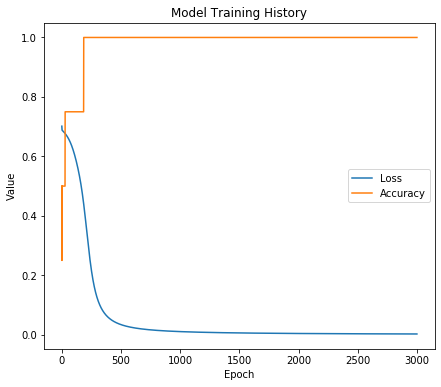

In [18]:
plt.figure(figsize=(7, 6))
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()